In [4]:
import pretty_midi as pm 
import mido
from IPython import display
import numpy as np
import copy
import os
import pickle

In [16]:
def change_tempo(filename):
    mid = mido.MidiFile(filename)
    new_mid = mido.MidiFile()
    new_mid.ticks_per_beat = mid.ticks_per_beat
    for track in mid.tracks: 
        new_track = mido.MidiTrack()
        for msg in track:
            new_msg = msg.copy()
            if new_msg.type == 'set_tempo':
                new_msg.tempo = 500000 
                # default tempo, equates to 120 bpm (https://rb.gy/5dslmk)
            new_track.append(new_msg)
        new_mid.tracks.append(new_track)
    
    new_mid.save('data/samples/prelude_tempo.mid')

In [7]:
# Shifting, on midi representation, shift is a value from 1 to 128 representing the position of a note in the piano.
# For example, 0, 12, 24... represents C
def shift_midi_file(mid, shift):
    mid_cpy = copy.deepcopy(mid)
    for instrument in mid_cpy.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                note.pitch += shift
    
    return mid_cpy

In [11]:
NOTE_NAMES = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
MAJOR_SCALE = [0, 2, 4, 5, 7, 9, 11]

<BarContainer object of 12 artists>

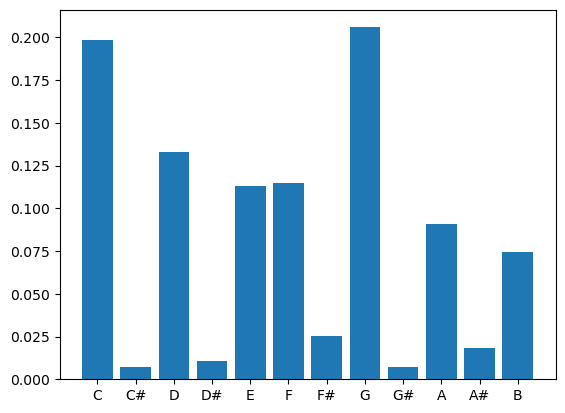

In [12]:
plt.bar(NOTE_NAMES, mid.get_pitch_class_histogram())

<BarContainer object of 12 artists>

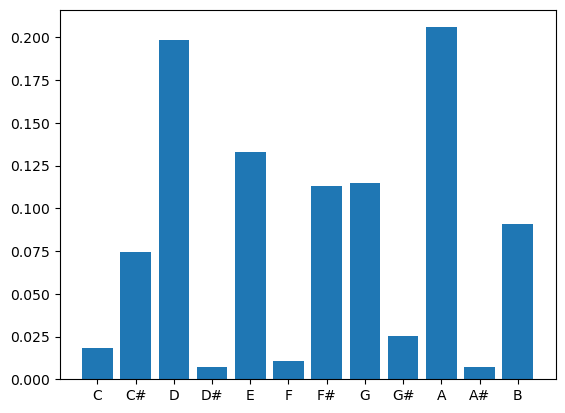

In [13]:
plt.bar(NOTE_NAMES, shifted_mid.get_pitch_class_histogram())

In [15]:
mid2 = pm.PrettyMIDI('data/samples/cannon.mid')

<BarContainer object of 12 artists>

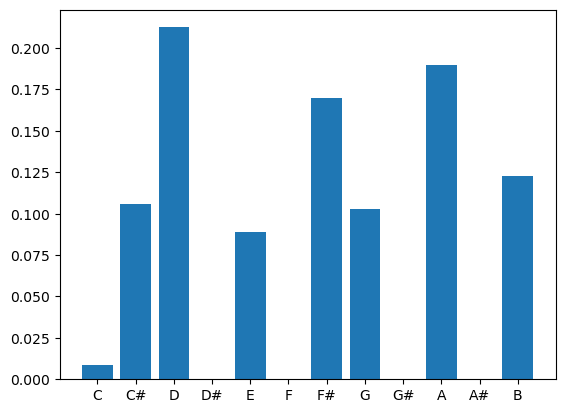

In [16]:
plt.bar(NOTE_NAMES, mid2.get_pitch_class_histogram())

In [17]:
mid2.instruments

[Instrument(program=0, is_drum=False, name="Track 1"),
 Instrument(program=0, is_drum=False, name="Track 2"),
 Instrument(program=0, is_drum=False, name="Track 3"),
 Instrument(program=0, is_drum=False, name="")]

In [18]:
display_audio(shift_midi_file(mid2, -1))

In [141]:
# To figure out a scale, we can check the 7 most used notes and match them with the corresponding scale


In [147]:
mid.get_pitch_class_histogram()

array([0.19854281, 0.00728597, 0.13296903, 0.01092896, 0.1129326 ,
       0.1147541 , 0.02550091, 0.20582878, 0.00728597, 0.09107468,
       0.01821494, 0.07468124])

In [34]:
def get_key(mid):
    freqs = mid.get_pitch_class_histogram()
    notes = []
    for i, f in enumerate(freqs):
        notes.append((f, i))
    notes.sort(reverse=True)
    notes = notes[:7]
    
    notes = [note[1] for note in notes]
    notes.sort()
    # print(notes)
    for i in range(12):
        scale_notes = [int((note + i) % 12) for note in MAJOR_SCALE]
        scale_notes.sort()
        if notes == scale_notes:
            return i
    
    return -1

In [20]:
mid2

In [22]:
mid3 = pm.PrettyMIDI('data/samples/real.mid')

In [205]:
display_audio(shift_midi_file(mid3, 1))

In [23]:
key = get_key(mid3)
if key != -1:
    print(NOTE_NAMES[key])
else:
    print('WEIRD')

[0, 2, 4, 5, 7, 9, 11]
C


<BarContainer object of 12 artists>

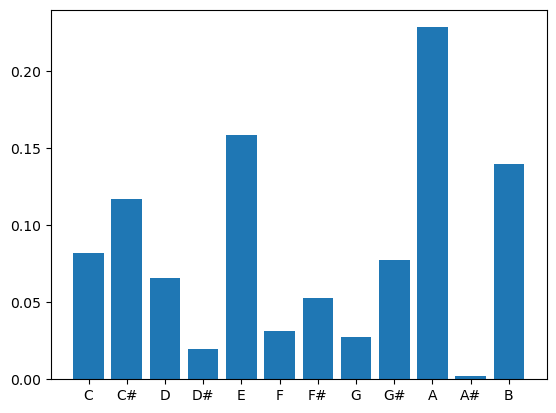

In [201]:
plt.bar(note_names, mid3.get_pitch_class_histogram())

In [ ]:
cnt = [0 for i in range(13)]
for path, dirs, files in os.walk('./data/lmd_matched'):
    for name in files:
        file_path = (f'{path}/{name}').replace('\\', '/')
        try:
            mid = pm.PrettyMIDI(file_path)
            key = get_key(mid)
            cnt[key + 1] += 1
            print(cnt)
        except:
            print(f'Problem in file {file_path}') 

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[4, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0]
[5, 4, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[5, 5, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[5, 6, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 6, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 7, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 8, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 8, 0, 1, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 8, 0, 2, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 8, 0, 3, 0, 0, 2, 0, 4, 0, 0, 0, 0]
[6, 8, 0, 3, 0, 0, 2, 0, 4, 0, 1, 0, 0]
[6, 8, 0, 3, 0, 0, 2, 0, 4, 0, 2, 0, 0]


[35, 45, 0, 8, 1, 4, 14, 1, 24, 0, 23, 21, 5]
[35, 45, 1, 8, 1, 4, 14, 1, 24, 0, 23, 21, 5]
[35, 45, 1, 8, 1, 4, 14, 2, 24, 0, 23, 21, 5]
[35, 45, 1, 8, 1, 4, 14, 3, 24, 0, 23, 21, 5]
[35, 45, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 5]
[35, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 5]
[36, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 5]
[37, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 5]
[38, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 5]
[38, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 6]
[39, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 21, 6]
[39, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 22, 6]
[39, 46, 1, 8, 1, 4, 14, 4, 24, 0, 23, 23, 6]
Problem in file ./data/lmd_matched/lmd_matched/A/B/A/TRABAYJ128F92E34EC/3056c10a32eae29dc187cb8c742ecbb7.mid
[39, 46, 1, 8, 1, 4, 15, 4, 24, 0, 23, 23, 6]
[39, 46, 1, 8, 1, 4, 16, 4, 24, 0, 23, 23, 6]
[39, 46, 1, 8, 1, 4, 16, 4, 24, 0, 23, 23, 7]
[39, 46, 1, 8, 1, 4, 16, 4, 24, 0, 23, 23, 8]
[39, 46, 1, 8, 1, 4, 16, 4, 24, 0, 23, 23, 9]
[39, 46, 1, 8, 1, 4, 16, 4, 24, 0, 23, 23, 10]
[39, 46, 2, 8, 1

[53, 55, 16, 19, 3, 6, 47, 10, 38, 11, 31, 44, 10]
[53, 55, 16, 20, 3, 6, 47, 10, 38, 11, 31, 44, 10]
[53, 55, 16, 21, 3, 6, 47, 10, 38, 11, 31, 44, 10]
[53, 55, 16, 21, 3, 6, 47, 11, 38, 11, 31, 44, 10]
[53, 55, 16, 21, 4, 6, 47, 11, 38, 11, 31, 44, 10]
[54, 55, 16, 21, 4, 6, 47, 11, 38, 11, 31, 44, 10]
[54, 55, 16, 21, 4, 6, 48, 11, 38, 11, 31, 44, 10]
[54, 55, 16, 21, 4, 6, 49, 11, 38, 11, 31, 44, 10]
[54, 55, 16, 21, 4, 6, 50, 11, 38, 11, 31, 44, 10]
[54, 55, 16, 21, 4, 6, 50, 11, 38, 11, 32, 44, 10]
[54, 56, 16, 21, 4, 6, 50, 11, 38, 11, 32, 44, 10]
[54, 57, 16, 21, 4, 6, 50, 11, 38, 11, 32, 44, 10]
[54, 57, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 10]
[55, 57, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 10]
[55, 57, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 11]
[56, 57, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 11]
[57, 57, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 11]
[57, 58, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 11]
[57, 59, 16, 21, 4, 6, 51, 11, 38, 11, 32, 44, 11]
[58, 59, 16, 21, 4, 6, 51, 11, 

[79, 77, 20, 31, 6, 10, 76, 13, 61, 13, 56, 45, 12]
[80, 77, 20, 31, 6, 10, 76, 13, 61, 13, 56, 45, 12]
[80, 77, 20, 32, 6, 10, 76, 13, 61, 13, 56, 45, 12]
[80, 77, 20, 32, 6, 10, 76, 14, 61, 13, 56, 45, 12]
[80, 77, 20, 33, 6, 10, 76, 14, 61, 13, 56, 45, 12]
[80, 77, 20, 33, 7, 10, 76, 14, 61, 13, 56, 45, 12]
Problem in file ./data/lmd_matched/lmd_matched/A/D/A/TRADABC128F4274FCC/81832835fff813b88fed024ecbab1f0d.mid
[80, 78, 20, 33, 7, 10, 76, 14, 61, 13, 56, 45, 12]
[80, 79, 20, 33, 7, 10, 76, 14, 61, 13, 56, 45, 12]
[80, 79, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 79, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 80, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 81, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 82, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 83, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 84, 20, 33, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 84, 20, 34, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 84, 20, 35, 7, 11, 76, 14, 61, 13, 56, 45, 12]
[81, 84

[109, 84, 20, 62, 7, 11, 118, 32, 74, 13, 66, 46, 12]
[109, 84, 20, 62, 7, 11, 119, 32, 74, 13, 66, 46, 12]
[109, 84, 20, 62, 7, 11, 119, 32, 74, 13, 67, 46, 12]
[109, 84, 20, 62, 7, 11, 120, 32, 74, 13, 67, 46, 12]
[110, 84, 20, 62, 7, 11, 120, 32, 74, 13, 67, 46, 12]
[110, 84, 20, 63, 7, 11, 120, 32, 74, 13, 67, 46, 12]
[111, 84, 20, 63, 7, 11, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 11, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 12, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 13, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 14, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 15, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 16, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 17, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 18, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 19, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 20, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 21, 120, 32, 74, 13, 67, 46, 12]
[112, 84, 20, 63, 7, 22, 120

[152, 101, 20, 70, 18, 36, 130, 33, 80, 14, 72, 60, 19]
[152, 101, 20, 71, 18, 36, 130, 33, 80, 14, 72, 60, 19]
[152, 101, 20, 72, 18, 36, 130, 33, 80, 14, 72, 60, 19]
[152, 101, 20, 72, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[152, 101, 20, 73, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 101, 20, 73, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 101, 20, 74, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 101, 20, 75, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 101, 20, 76, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 76, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 77, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 78, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 79, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 80, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 81, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 82, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 83, 19, 36, 130, 33, 80, 14, 72, 60, 19]
[153, 102, 20, 84, 19, 36, 130, 33, 80, 14, 72, 

[166, 109, 21, 136, 22, 36, 138, 33, 81, 15, 78, 95, 19]
[166, 110, 21, 136, 22, 36, 138, 33, 81, 15, 78, 95, 19]
[167, 110, 21, 136, 22, 36, 138, 33, 81, 15, 78, 95, 19]
[168, 110, 21, 136, 22, 36, 138, 33, 81, 15, 78, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 78, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 79, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 80, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 81, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 82, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 83, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 84, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 85, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 86, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 87, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 88, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 89, 95, 19]
[168, 110, 21, 137, 22, 36, 138, 33, 81, 15, 90, 95, 19]
[168, 110, 22, 137, 22, 36, 138

[204, 136, 22, 146, 26, 45, 146, 35, 88, 16, 96, 108, 22]
[204, 136, 22, 146, 27, 45, 146, 35, 88, 16, 96, 108, 22]
[204, 136, 22, 146, 27, 45, 146, 35, 89, 16, 96, 108, 22]
[204, 136, 22, 147, 27, 45, 146, 35, 89, 16, 96, 108, 22]
[204, 136, 22, 148, 27, 45, 146, 35, 89, 16, 96, 108, 22]
[204, 136, 22, 148, 27, 45, 146, 35, 90, 16, 96, 108, 22]
[204, 136, 22, 148, 27, 45, 146, 35, 91, 16, 96, 108, 22]
[204, 136, 22, 148, 27, 45, 146, 35, 92, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 92, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 93, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 94, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 95, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 96, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 97, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 98, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 99, 16, 96, 108, 22]
[204, 136, 22, 149, 27, 45, 146, 35, 99, 16, 97, 108, 22]
[205, 136, 22,

[224, 150, 34, 161, 28, 53, 174, 35, 109, 20, 100, 117, 23]
[224, 150, 34, 161, 28, 53, 175, 35, 109, 20, 100, 117, 23]
[224, 150, 34, 161, 28, 53, 176, 35, 109, 20, 100, 117, 23]
[224, 150, 34, 161, 28, 53, 177, 35, 109, 20, 100, 117, 23]
[224, 150, 34, 161, 28, 53, 177, 35, 109, 20, 100, 118, 23]
[224, 150, 34, 161, 28, 53, 178, 35, 109, 20, 100, 118, 23]
[224, 150, 34, 161, 28, 53, 179, 35, 109, 20, 100, 118, 23]
[224, 150, 34, 161, 28, 53, 180, 35, 109, 20, 100, 118, 23]
[224, 150, 34, 161, 28, 53, 180, 35, 109, 20, 100, 119, 23]
[224, 150, 34, 161, 28, 53, 181, 35, 109, 20, 100, 119, 23]
[224, 150, 34, 161, 28, 53, 181, 35, 109, 20, 100, 120, 23]
[224, 150, 34, 161, 28, 53, 181, 35, 109, 20, 100, 121, 23]
[224, 150, 34, 161, 28, 53, 181, 35, 109, 20, 100, 122, 23]
[224, 150, 34, 161, 28, 53, 182, 35, 109, 20, 100, 122, 23]
[224, 150, 34, 161, 28, 53, 183, 35, 109, 20, 100, 122, 23]
[224, 150, 34, 161, 28, 53, 183, 35, 109, 20, 100, 123, 23]
[224, 150, 34, 161, 28, 53, 183, 35, 109

[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 135, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 136, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 137, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 138, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 139, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 140, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 141, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 142, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 143, 24]
[236, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 188, 35, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 189, 35, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 189, 36, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 190, 36, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 191, 36, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 192, 36, 121, 21, 103, 144, 24]
[237, 193, 36, 167, 47, 54, 192, 36, 122

# Changing tempo

In [29]:
def create_file_new_tempo(filename, path, new_path):
    mid = mido.MidiFile(path + filename)
    new_mid = mido.MidiFile()
    new_mid.ticks_per_beat = mid.ticks_per_beat
    for track in mid.tracks: 
        new_track = mido.MidiTrack()
        for msg in track:
            new_msg = msg.copy()
            if new_msg.type == 'set_tempo':
                new_msg.tempo = 500000 
                # default tempo, equates to 120 bpm (https://rb.gy/5dslmk)
            new_track.append(new_msg)
        new_mid.tracks.append(new_track)
    
    new_mid.save(new_path + filename)

In [32]:
for path, dirs, files in os.walk('./data/lmd_matched'):
    path = path.replace('\\', '/') + '/'
    for name in files:
        name = name.replace('\\', '/')
        try:
            create_file_new_tempo(name, path, './data/adjusted_tempo/')
        except Exception as e:
            print(f'Problem in file {path + name}')
            print(e)

Problem in file ./data/lmd_matched/lmd_matched/A/A/M/TRAAMBM128F4248306/1d2b92aa9e454280cca21fae99ebce8e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/A/A/M/TRAAMBM128F4248306/cfdc20d17d7ae95f3493dbf1c3177148.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/A/A/S/TRAASMT12903CC238B/913503a9957064c04d5cc72e351bf485.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/A/B/A/TRABAYJ128F92E34EC/3056c10a32eae29dc187cb8c742ecbb7.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/A/B/B/TRABBNH128F93392A1/62f4d8788ba05f3c49ebfa6fc9164621.mid

Problem in file ./data/lmd_matched/lmd_matched/A/B/Y/TRABYJG128F424D12B/2cdb25a9abc795d12679c3f6abc2b212.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/A/C/P/TRACPEN128F4293F01/c7322533636b55d8eb7feb62bb7a2256.mid

Problem in file ./data/lmd_matched/lmd_matched/A/F/H/TRAFHVP128F4

Problem in file ./data/lmd_matched/lmd_matched/B/L/I/TRBLIVP128F92F16B5/fdf6f5abc9a87c4af2028aa3aa5a2a08.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/B/M/F/TRBMFRN128F92DD39F/0ab8282f106ade01f1ad2f9777141145.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/B/M/X/TRBMXRE128F428F8E7/f405900fe143f315fb9b43c1e9f72275.mid
Could not decode key with 3 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/B/N/L/TRBNLHU128F14910D7/a14f09997143aca914303a316f4bb848.mid

Problem in file ./data/lmd_matched/lmd_matched/B/O/F/TRBOFTY128F14A37B1/2734cb37f071920a32efaa3042e4f641.mid

Problem in file ./data/lmd_matched/lmd_matched/B/O/U/TRBOUEY128F92FC6BB/63cb427bd7765d1bd3335abb8738dd69.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/B/P/E/TRBPETA128F92FDDA6/c0b71ff90c7b2e642624071a9c6156d3.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/B/Q/N

Problem in file ./data/lmd_matched/lmd_matched/C/X/X/TRCXXOV128F93186C2/84ad0871ac9c525be379442da96ed3f5.mid

Problem in file ./data/lmd_matched/lmd_matched/C/Y/X/TRCYXAK128F4263BE1/24df6523c8b68884e3224c3de859b9a1.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/C/Z/B/TRCZBAC128F4242937/f4b62525caec217f14bc6f4cd73baf86.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/C/Z/G/TRCZGXA128F429757C/552ca4c38cd6b1bbd0c0fa85b200b53e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/C/Z/I/TRCZIUO12903CE5274/bb2ac596b49bd6e217f3acf1351efb51.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/C/Z/Z/TRCZZUC128F422BA5A/36be514cae1370e9d771710158d7551f.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/D/D/C/TRDDCTL128F92EE5B6/572b7562af9fe77d917bd5a6ef252ddd.mid

Problem in file ./data/lmd_matched/lmd_matched/D/D/P/TRDDPKL128F9

Problem in file ./data/lmd_matched/lmd_matched/E/G/F/TREGFWE128F9343C7C/7cf9dd1be056045319b59ab37c6746b4.mid

Problem in file ./data/lmd_matched/lmd_matched/E/G/J/TREGJCS128E0784FBC/6dbacc8f20bf4604d7f9827eb51bcbe4.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/E/G/J/TREGJCS128E0784FBC/a6114ec855fbfdc24689456c96d6eb14.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/E/G/M/TREGMUH128F4252DA3/6b44202612659b7ecc6c2a95d2af0e39.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/E/G/O/TREGOTM128F148704C/4af6d92c414e6c6a3ff10c3cb01983f8.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/E/H/F/TREHFVL128F42597D9/f69c845a8810ac664740d663e872848b.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/E/H/S/TREHSIM128F424FAD7/36be514cae1370e9d771710158d7551f.mid
data byte must be in range 0..127
Problem in file ./data/lmd_match

Problem in file ./data/lmd_matched/lmd_matched/F/P/B/TRFPBJX128F42835FD/84ad0871ac9c525be379442da96ed3f5.mid

Problem in file ./data/lmd_matched/lmd_matched/F/P/J/TRFPJWJ128F428FA10/ff243093e079fdc5c5f413b92ec2967e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/F/P/U/TRFPUUK128F42851B6/ae1d5fc2a8cad6e8582b8f3748ba058e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/F/P/Z/TRFPZQF128F427B14B/53f52dc1dad69ee388c9a1ac10a8f0a2.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/F/Q/D/TRFQDNW128F92E6646/539e5566a50e16fc46c35f118ae3eca8.mid

Problem in file ./data/lmd_matched/lmd_matched/F/Q/L/TRFQLJZ128EF34588E/5bbf816ab8ee57be1d92b57798ae00e1.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/F/Q/N/TRFQNEL128F933580C/787c1d1352302ba1bef7fa944e71d1db.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/F/Q/R/TRFQRTW128F4

Problem in file ./data/lmd_matched/lmd_matched/H/A/V/TRHAVBB128F92EC11B/ac5d0abee6c8f9007e04a14b7bca6c2a.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/H/A/V/TRHAVBB128F92EC11B/c871c366bd424a848b54b29dce00bbfe.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/H/B/P/TRHBPXU128F4255D9F/ba2c6886f6ed8f7ac713373e651d9e7a.mid
Could not decode key with 1 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/H/C/W/TRHCWDX128F425CBE4/a5c32497c73668df835d1f96114c84c4.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/H/F/F/TRHFFOC128F92F901F/9475d9e1cd8cc716337c50a34a6b2bfb.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/H/F/M/TRHFMIK12903D07379/62f4d8788ba05f3c49ebfa6fc9164621.mid

Problem in file ./data/lmd_matched/lmd_matched/H/F/S/TRHFSAK128F42A0CB5/ae1d5fc2a8cad6e8582b8f3748ba058e.mid
data byte must be in range 0..127
Problem in file ./d

Problem in file ./data/lmd_matched/lmd_matched/I/T/E/TRITESG128F14A913F/0b0812979e33c132046d24575ff810cf.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/I/T/P/TRITPNN128F4279C0F/62f4d8788ba05f3c49ebfa6fc9164621.mid

Problem in file ./data/lmd_matched/lmd_matched/I/W/A/TRIWAFG128F429E96F/81457a5e14de4f19cd4640ad7db033e3.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/I/W/R/TRIWRFX128F92EAA9C/b7e83de910bdc1b7c4b7839bce4814bd.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/I/Y/R/TRIYRFI128F42AF800/f405900fe143f315fb9b43c1e9f72275.mid
Could not decode key with 3 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/I/Z/I/TRIZIMS128F426A642/861be3565cd56ec99cf1d7dfc048c665.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/I/Z/O/TRIZOFZ128F429250C/0d6dac8f5dc8c2e9387f25b343bab1a2.mid
data byte must be in range 0..127
Problem in file ./d

Problem in file ./data/lmd_matched/lmd_matched/K/Q/G/TRKQGMV128F426DE6E/5ca86140d4b95174ebae6f9669bd6e0d.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/K/Q/U/TRKQUZA128F145F3E6/9cf2822ed72e2dfdde4a8b958d8eab60.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/K/T/R/TRKTRGF128F42B323B/62a8b9e3a22fc92fc69b49d15d790f05.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/K/T/U/TRKTUNG128F428C575/5e22504465505a9f062b9e282420d627.mid
Could not decode key with 1 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/K/X/P/TRKXPZC128F932B753/0b0812979e33c132046d24575ff810cf.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/K/Z/G/TRKZGRL128E07830ED/ff60a183855cade98bb3faaf0bc77d32.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/K/Z/Q/TRKZQMX128F14774F1/f2b02a53f838c42c7a479689f9b0bf81.mid
data byte must be in

Problem in file ./data/lmd_matched/lmd_matched/M/K/F/TRMKFIW128F4288062/539e5566a50e16fc46c35f118ae3eca8.mid

Problem in file ./data/lmd_matched/lmd_matched/M/K/M/TRMKMQA12903D042D6/2b01c85978d4d07af2780d8963101ade.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/M/N/B/TRMNBFG128F932BAEB/861be3565cd56ec99cf1d7dfc048c665.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/M/N/C/TRMNCLY128F92E903B/044dc3d34cd462e48fa067f9cd4adb0a.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/M/O/G/TRMOGAK12903CEC6CF/63cb427bd7765d1bd3335abb8738dd69.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/M/O/H/TRMOHQY128F1467D0B/76666a63f11fc158a8e49fb2d5463303.mid
Could not decode key with 1 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/M/P/F/TRMPFNL128F427F0BF/5711e0cb2d8d94fa98bcc1a09d71b70a.mid
data byte must be in range 0..127
Problem in file ./d

Problem in file ./data/lmd_matched/lmd_matched/O/B/N/TROBNTT128F427148F/9c28d75d905205c74db696a66ee9bcd5.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/O/B/Q/TROBQRS12903CB9E29/a3b878088406be96eb6e40c99db08273.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/O/C/Z/TROCZTE128F42886BE/81457a5e14de4f19cd4640ad7db033e3.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/O/E/W/TROEWTY128F4248A30/83eb2e95d4d92c7cce372a1a5af5d9ea.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/O/F/B/TROFBYC128F92FA236/2912e2d56c727481b49a6d57b32edcc9.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/O/F/B/TROFBYC128F92FA236/e848ed42ec8101ca0d7ff3f37cda1641.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/O/G/B/TROGBID128F426377E/22a03272e0b360487723e52dff07b7cd.mid
data byte must be in range 0..127

Problem in file ./data/lmd_matched/lmd_matched/P/L/F/TRPLFHR128F42709E7/862b82b54c211fd12796bb6c23282e11.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/P/M/H/TRPMHKH128F422B8F9/9f79f5113aa40a71564937281bcc077e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/P/M/S/TRPMSAQ128F4288313/12db50fa7ccc685174187a082c4700f0.mid
Could not decode key with 1 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/P/M/S/TRPMSAQ128F4288313/28e494e71fe736532cf6d6744633be8e.mid
Could not decode key with 1 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/P/P/Y/TRPPYLB128F933FFEB/9f79f5113aa40a71564937281bcc077e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/P/R/B/TRPRBBK12903CF60D1/0e4b24a4b90d14e02a7b33e5672dfbd4.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/P/S/D/TRPSDPM128F42827AF/b7e83de910bdc1b7c4b7839bce4814bd.mid
data by

Problem in file ./data/lmd_matched/lmd_matched/R/E/A/TRREALI12903CE9E41/edd509df8f2fd5830840d181520bad85.mid

Problem in file ./data/lmd_matched/lmd_matched/R/G/E/TRRGEJM128F1480E86/b9f036f4b023b85acb04ef5bbc697c87.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/R/G/E/TRRGEOW128F933DC7D/b022f1d8bea4c8a4879d642faffa65dd.mid

Problem in file ./data/lmd_matched/lmd_matched/R/G/H/TRRGHPO128F429253D/de4496eb66ae5037c8166ac51b09dbab.mid
Could not decode key with 2 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/R/G/J/TRRGJNU128F92F42BF/99e0efcd4a2076071e8dadafe8ff7cf8.mid

Problem in file ./data/lmd_matched/lmd_matched/R/G/X/TRRGXJL128F92F2412/6aa4cc46214309060cc957c0f7da905a.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/R/H/F/TRRHFHS128F9317057/827af6bbff51012a0ea35227aa4f877a.mid
Could not decode key with 5 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/R/H/H/TRRHHAT128F92F90A3/

Problem in file ./data/lmd_matched/lmd_matched/S/S/C/TRSSCCL128F4257F6C/25e86ebe78270f413114f953cd3b4cfb.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/S/S/D/TRSSDHO128F9310EA5/bd98be74b612a1561b86aad711a35179.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/S/S/I/TRSSIVP128F92E63F7/b3fd44ed163db20f013270c37a2e047c.mid
Could not decode key with 3 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/S/T/M/TRSTMUC128F4271B21/c6e36f0db6e0d4d2dfaa8ce83116b394.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/S/U/S/TRSUSVK128F92CBA83/e6f0596983429cbd1b693abd655d71b6.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/S/W/H/TRSWHGT12903CFB97A/ad70cb4694c4e93151e4a2972299ac24.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/S/Y/O/TRSYOHO128F4299957/77949f76eff8ce6d3bd6693fa55c32eb.mid

Problem in file ./d

Problem in file ./data/lmd_matched/lmd_matched/U/F/T/TRUFTAO128F9314A02/cc10070c1d6389019ca21489a397b27e.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/U/H/O/TRUHOPW128F9332B42/ee4aa97d0157cecca0f685a4fb267b6f.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/U/H/P/TRUHPAT128F934FA6B/f405900fe143f315fb9b43c1e9f72275.mid
Could not decode key with 3 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/U/I/E/TRUIEOO128F4244CD8/a49d02d6f326cb3bf9b2d8bab5622e7a.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/U/I/Z/TRUIZTQ128F427181C/861be3565cd56ec99cf1d7dfc048c665.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/U/J/O/TRUJONK12903C96987/2cdb25a9abc795d12679c3f6abc2b212.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/U/L/Z/TRULZOF128F934B897/ca1c7906ed80ade81206de8c2ebf1d89.mid
data byte must be in

Problem in file ./data/lmd_matched/lmd_matched/V/Y/X/TRVYXGT128F1453DD4/04fba9bfc79826e9dc9c0e25918c46eb.mid

Problem in file ./data/lmd_matched/lmd_matched/V/Y/X/TRVYXGT128F1453DD4/3294b53156fc171f6b659c134104c5d9.mid

Problem in file ./data/lmd_matched/lmd_matched/W/A/C/TRWACAW128F147C155/285a1b4b42d3d71857515d47715cd6cc.mid
Could not decode key with 2 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/W/B/O/TRWBOFQ128F145A8F1/3f53ca2b9d3922f0e3542a692e54c00d.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/W/C/F/TRWCFRS128F427C5B5/2ac2bed35f785fef09e58cc749f1e7b8.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/W/E/W/TRWEWWW128F4285E21/10d80d293ef6ce2c8baf68d4a593d2c7.mid
Could not decode key with 3 flats and mode 255
Problem in file ./data/lmd_matched/lmd_matched/W/F/S/TRWFSMC128F426C678/d581742c0004c7d8050dc0638d373d0b.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_

Problem in file ./data/lmd_matched/lmd_matched/X/J/Y/TRXJYEO128F426AD39/c6e36f0db6e0d4d2dfaa8ce83116b394.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/X/K/I/TRXKIOT128F426707F/bf2c5319603b7e00cee3b4f7dd13d8cd.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/X/L/I/TRXLIMY12903CB26C9/6a3e351f2d56790943bd3ed533b00995.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/X/N/B/TRXNBAZ128F931B373/1fef835d0a75cf14122db074d755d104.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/X/O/F/TRXOFFX128F42962D7/2b033c9be344546f11e0e20b0ffadfee.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/X/O/P/TRXOPBY128F148B6F9/a060f961557dab7031d0070b8b794394.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/X/O/P/TRXOPSE12903CF4D0E/787c1d1352302ba1bef7fa944e71d1db.mid
data byte must be in range 0..127

Problem in file ./data/lmd_matched/lmd_matched/Y/Z/G/TRYZGRR128F4246D6C/089b28e63de3f396ede740eb9bd3e97a.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/Y/Z/G/TRYZGRR128F4246D6C/68f21de0eb97c07a48466c3bd6fc3335.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/Y/Z/G/TRYZGRR128F4246D6C/9ddb8a06522ebba57371f7ec9749d37f.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/Y/Z/G/TRYZGRR128F4246D6C/a9211cb5a614c7783011ffc11a9f32d4.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/Y/Z/G/TRYZGRR128F4246D6C/c9f00659b843001c24c2bfaa6fdbd922.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/Y/Z/S/TRYZSBI128EF33ED6F/2cdb25a9abc795d12679c3f6abc2b212.mid
data byte must be in range 0..127
Problem in file ./data/lmd_matched/lmd_matched/Z/A/M/TRZAMGF128F427E086/dfb422428810bfb65f2d73cba2baf834.mid
Could not decode key with 4 flats

# Filtering major/minor scale and shifting to C major

In [37]:
NOTE_NAMES = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
MAJOR_SCALE = [0, 2, 4, 5, 7, 9, 11]
def get_key(mid):
    freqs = mid.get_pitch_class_histogram()
    notes = []
    for i, f in enumerate(freqs):
        notes.append((f, i))
    notes.sort(reverse=True)
    notes = notes[:7]
    
    notes = [note[1] for note in notes]
    notes.sort()
    # print(notes)
    for i in range(12):
        scale_notes = [int((note + i) % 12) for note in MAJOR_SCALE]
        scale_notes.sort()
        if notes == scale_notes:
            return i
    
    return -1

In [38]:
# Shifting, on midi representation, shift is a value from 1 to 128 representing the position of a note in the piano.
# For example, 0, 12, 24... represents C
def shift_midi_file(mid, shift, pathfile):
    for instrument in mid.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                note.pitch += shift
    
    mid.write(pathfile)

In [40]:
cnt = [0 for i in range(13)]
step = 0
for path, dirs, files in os.walk('./data/adjusted_tempo'):
    for name in files:
        file_path = (f'{path}/{name}').replace('\\', '/')
        try:
            mid = pm.PrettyMIDI(file_path)
            key = get_key(mid)
            cnt[key + 1] += 1
            if step % 100 == 99:
                print(cnt)
            step += 1
            if key != -1:
                shift_midi_file(mid, -key, './data/at_shifted/' + name)
        except Exception as e:
            print(f'Problem in file {file_path}') 
            print(e)

Problem in file ./data/adjusted_tempo/00417f74adf57e4a9fbcb2d670b0e762.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/004ffe87d8c5028b3a314c3d63648d45.mid
data byte must be in range 0..127
[17, 15, 2, 13, 6, 5, 13, 3, 13, 2, 5, 4, 2]
[28, 28, 3, 23, 8, 14, 23, 9, 28, 3, 15, 14, 4]
[49, 41, 7, 32, 12, 16, 38, 9, 44, 6, 21, 21, 4]
[62, 57, 11, 41, 22, 23, 43, 10, 58, 10, 27, 31, 5]
[79, 73, 16, 46, 28, 30, 53, 14, 75, 10, 31, 38, 7]
Problem in file ./data/adjusted_tempo/030c32d2f91c50ff93955e2fedbe0914.mid
data byte must be in range 0..127
[91, 91, 19, 52, 30, 38, 62, 19, 94, 12, 37, 46, 9]
[115, 99, 22, 62, 38, 43, 72, 19, 108, 14, 44, 53, 11]
Problem in file ./data/adjusted_tempo/044762459bc5b38ecbfbef131fac1e18.mid
data byte must be in range 0..127
[133, 117, 25, 68, 44, 46, 84, 24, 119, 17, 47, 61, 15]
Problem in file ./data/adjusted_tempo/046994ecee27def5c632e3dfe6e2a06c.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/04be7adf

[1350, 1025, 181, 594, 332, 321, 621, 163, 811, 174, 398, 403, 127]
[1365, 1041, 186, 602, 335, 328, 630, 165, 829, 178, 405, 407, 129]
Problem in file ./data/adjusted_tempo/26067e514f620580370e0709566a8bf2.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/2608af7a8fb8efc95d8b3773f4c870ea.mid
data byte must be in range 0..127
[1384, 1055, 189, 608, 343, 334, 637, 165, 840, 185, 416, 413, 131]
[1409, 1069, 192, 618, 349, 337, 643, 166, 851, 191, 423, 417, 135]
[1431, 1083, 194, 626, 352, 343, 652, 168, 866, 195, 432, 421, 137]
[1460, 1096, 198, 638, 355, 347, 656, 169, 880, 198, 437, 428, 138]
Problem in file ./data/adjusted_tempo/28001abe47e25b647e3334e4a685e1f8.mid
data byte must be in range 0..127
[1482, 1114, 198, 646, 363, 350, 670, 170, 893, 202, 440, 433, 139]
Problem in file ./data/adjusted_tempo/2891571b283454fd673c2b6629b09453.mid
data byte must be in range 0..127
[1511, 1130, 200, 653, 371, 358, 677, 171, 901, 205, 446, 435, 142]
[1537, 1145, 201, 66

Problem in file ./data/adjusted_tempo/450ad53c14d59b5bf3e013f98b62c767.mid
data byte must be in range 0..127
[2521, 1878, 343, 1081, 603, 575, 1104, 266, 1457, 362, 760, 712, 238]
Problem in file ./data/adjusted_tempo/4642e98c7a0ed66b1d2a3fbe741655c7.mid
data byte must be in range 0..127
[2540, 1890, 346, 1093, 608, 577, 1115, 267, 1475, 364, 765, 717, 243]
[2557, 1905, 351, 1100, 612, 584, 1128, 269, 1487, 368, 771, 724, 244]
Problem in file ./data/adjusted_tempo/47c492ecbdd12e2f7d0689b0c9d81d6c.mid
data byte must be in range 0..127
[2580, 1919, 353, 1110, 618, 591, 1137, 270, 1495, 372, 781, 730, 244]
[2600, 1933, 356, 1120, 623, 598, 1144, 272, 1510, 375, 783, 739, 247]
[2637, 1945, 356, 1127, 627, 602, 1150, 274, 1523, 378, 787, 743, 251]
Problem in file ./data/adjusted_tempo/4b6cbe43e7349a96004ce1b0a298a41d.mid
data byte must be in range 0..127
[2658, 1967, 359, 1137, 632, 605, 1158, 275, 1534, 379, 792, 748, 256]
[2681, 1987, 361, 1143, 636, 610, 1168, 276, 1547, 383, 798, 752, 2

[3980, 2985, 507, 1733, 901, 927, 1698, 409, 2256, 567, 1180, 1075, 382]
[4003, 3011, 511, 1740, 904, 933, 1701, 413, 2271, 570, 1181, 1079, 383]
[4027, 3024, 517, 1743, 909, 941, 1707, 414, 2284, 573, 1189, 1087, 385]
Problem in file ./data/adjusted_tempo/700ebef7289da242a9c8a7fd4ffdf39e.mid
data byte must be in range 0..127
[4049, 3038, 520, 1754, 911, 945, 1713, 416, 2297, 576, 1200, 1096, 385]
Problem in file ./data/adjusted_tempo/70b6290c00a8e201426d444a99c2150e.mid
data byte must be in range 0..127
[4072, 3052, 521, 1765, 919, 948, 1720, 420, 2314, 580, 1205, 1097, 387]
[4093, 3069, 523, 1770, 931, 950, 1731, 420, 2325, 585, 1209, 1106, 388]
Problem in file ./data/adjusted_tempo/71b6da7385f5962381b054135098a973.mid
data byte must be in range 0..127
[4121, 3086, 528, 1777, 936, 957, 1737, 422, 2334, 587, 1213, 1112, 390]
[4148, 3101, 530, 1786, 939, 963, 1741, 423, 2349, 588, 1223, 1118, 391]
Problem in file ./data/adjusted_tempo/72b8d5aca15bad5ab5afe348a1019edc.mid
data byte must

Problem in file ./data/adjusted_tempo/8d85989a1c515b18ad14de1539a61908.mid
data byte must be in range 0..127
[5192, 3821, 637, 2237, 1183, 1195, 2207, 536, 2951, 736, 1554, 1369, 482]
[5218, 3829, 637, 2251, 1189, 1199, 2216, 540, 2966, 742, 1557, 1373, 483]
Problem in file ./data/adjusted_tempo/8e8153495dffc8259b1db81d25c130f1.mid
data byte must be in range 0..127
[5249, 3837, 640, 2261, 1195, 1208, 2223, 540, 2978, 744, 1566, 1374, 485]
[5263, 3851, 642, 2275, 1203, 1214, 2228, 542, 2992, 747, 1573, 1381, 489]
[5284, 3863, 644, 2280, 1208, 1218, 2238, 546, 3006, 750, 1581, 1388, 494]
[5306, 3877, 644, 2284, 1214, 1223, 2249, 548, 3023, 753, 1589, 1395, 495]
[5327, 3889, 646, 2295, 1218, 1228, 2265, 550, 3034, 755, 1595, 1400, 498]
[5345, 3909, 646, 2310, 1226, 1231, 2272, 552, 3041, 757, 1602, 1410, 499]
Problem in file ./data/adjusted_tempo/917c3d3627736be981746fa182722608.mid
data byte must be in range 0..127
[5378, 3923, 647, 2315, 1229, 1236, 2282, 555, 3053, 759, 1606, 1415, 502

Problem in file ./data/adjusted_tempo/b25917188c1800083df919cde511fa95.mid
data byte must be in range 0..127
[6658, 4785, 791, 2845, 1490, 1559, 2774, 664, 3740, 944, 1963, 1766, 621]
[6675, 4800, 792, 2861, 1497, 1572, 2778, 665, 3757, 946, 1968, 1768, 621]
[6696, 4823, 797, 2870, 1501, 1577, 2781, 667, 3765, 951, 1975, 1773, 624]
[6725, 4839, 800, 2885, 1508, 1580, 2784, 667, 3778, 953, 1979, 1777, 625]
[6749, 4849, 801, 2897, 1515, 1588, 2796, 668, 3789, 957, 1981, 1785, 625]
Problem in file ./data/adjusted_tempo/b4bc3df83d5cf3a30f1f392c1771effc.mid
data byte must be in range 0..127
[6767, 4865, 804, 2905, 1519, 1594, 2808, 671, 3806, 957, 1987, 1792, 625]
Problem in file ./data/adjusted_tempo/b553c2474e913170f7a06d27cf417b8c.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/b55da0d7730596d2a18670b68a302548.mid
data byte must be in range 0..127
[6791, 4880, 806, 2915, 1523, 1596, 2819, 673, 3818, 961, 1990, 1800, 628]
[6815, 4897, 810, 2921, 1527, 1599, 282

[8023, 5809, 972, 3412, 1791, 1918, 3305, 796, 4493, 1119, 2369, 2148, 745]
Problem in file ./data/adjusted_tempo/d51d8a0861b0989d7e58edccfa361bbe.mid
data byte must be in range 0..127
[8044, 5826, 972, 3424, 1794, 1921, 3314, 797, 4508, 1125, 2374, 2155, 746]
[8065, 5844, 975, 3434, 1803, 1928, 3319, 800, 4516, 1127, 2379, 2161, 749]
[8087, 5857, 979, 3441, 1807, 1934, 3324, 800, 4528, 1133, 2389, 2170, 751]
Problem in file ./data/adjusted_tempo/d6e9dbdc91945cf0fef02ff9795758f0.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/d6ed83c8957d9659a4e51b0fdb9eae77.mid
data byte must be in range 0..127
[8107, 5873, 986, 3449, 1812, 1937, 3339, 802, 4536, 1135, 2392, 2177, 755]
[8127, 5882, 986, 3460, 1820, 1941, 3353, 803, 4549, 1140, 2397, 2184, 758]
[8150, 5895, 989, 3466, 1829, 1946, 3362, 807, 4561, 1144, 2400, 2190, 761]
[8172, 5913, 991, 3474, 1838, 1946, 3371, 809, 4571, 1145, 2411, 2196, 763]
Problem in file ./data/adjusted_tempo/d94cafefdac5b565c6ca11fda6a

Problem in file ./data/adjusted_tempo/f40a0644f572d8be38e639fe94ab5b67.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/f439fb155e282220716337470f22f39a.mid
data byte must be in range 0..127
[9267, 6724, 1142, 3905, 2050, 2203, 3846, 923, 5178, 1287, 2729, 2485, 861]
Problem in file ./data/adjusted_tempo/f47963e50de792d9d58f8766ed8841cf.mid
data byte must be in range 0..127
[9283, 6739, 1143, 3919, 2056, 2208, 3858, 924, 5186, 1294, 2738, 2490, 862]
Problem in file ./data/adjusted_tempo/f532183d4c2fc19461b194e3f2a2e9e7.mid
data byte must be in range 0..127
Problem in file ./data/adjusted_tempo/f544c41ca331ed4a058a0f735bf8e5a3.mid
data byte must be in range 0..127
[9304, 6759, 1147, 3931, 2060, 2213, 3867, 925, 5197, 1295, 2743, 2494, 865]
Problem in file ./data/adjusted_tempo/f5d2b332a60adef077e17b98b55f55c7.mid
data byte must be in range 0..127
[9325, 6770, 1149, 3940, 2067, 2219, 3879, 926, 5211, 1299, 2750, 2498, 867]
Problem in file ./data/adjusted_tempo/

# Saving as piano roll

In [12]:
def get_piano_roll_for_midi(mid):
    pr = mid.get_piano_roll(fs=4)
    pr[pr > 0] = 1
    return pr

In [13]:
for path, dirs, files in os.walk('./data/at_shifted'):
    for name in files:
        file_path = (f'{path}/{name}').replace('\\', '/')
        try:
            mid = pm.PrettyMIDI(file_path)
            pr = get_piano_roll_for_midi(mid)
            with open('./data/piano_rolls/' + name[:-4] + '.pickle', 'wb') as f:
                pickle.dump(pr, f)
        except Exception as e:
            print(f'Problem in file {file_path}')
            print(e)


KeyboardInterrupt



In [ ]:
mid = pm.PrettyMIDI('data/samples/scale.mid')

In [ ]:
pr_t = get_piano_roll_for_midi(mid)[60:73]

# Extracting chords

In [2]:
with open('data/piano_rolls/000aec55332d26c818c0d6cf6af40010.pickle', 'rb') as f: 
    pr = pickle.load(f)

In [56]:
def most_played_chord(pr):
    counts = np.zeros((12))
    for i in range(12):
        counts[i] += np.sum(pr[i::12])
    triad = np.sort(np.argsort(counts)[-3:])
    return triad[0] * 10000 + triad[1] * 100 + triad[2]

In [57]:
def extract_chords(pr):
    chords = []
    for i in range(0, pr.shape[1], 8):
        chords.append(mask_chord(most_played_chord(pr[:,i:i+8])))
    return np.array(chords)

In [62]:
CHORD_DICT = []
def mask_chord(chord):
    if not chord in CHORD_DICT:
        CHORD_DICT.append(chord)
    return CHORD_DICT.index(chord)

In [66]:
cnt = 0
for path, dirs, files in os.walk('./data/piano_rolls'):
    for name in files:
        file_path = (f'{path}/{name}').replace('\\', '/')
        try:
            with open(file_path, 'rb') as f:
                pr = pickle.load(f)
            chords = extract_chords(pr)
            with open('./data/chords/' + name, 'wb') as f:
                pickle.dump(chords, f)
                
            if cnt % 100 == 99:
                print(len(CHORD_DICT))
            cnt += 1
        except Exception as e:
            print(f'Problem in file {file_path}')
            print(e)

180
196
206
211
214
217
218
219
219
219
219
219
219
219
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220


In [67]:
with open('./data/chords/CHORD_DICT.pickle', 'wb') as f:
    pickle.dump(CHORD_DICT, f)

In [68]:
CHORD_DICT

[91011,
 20711,
 407,
 509,
 507,
 409,
 50709,
 207,
 709,
 711,
 20509,
 50711,
 40711,
 405,
 20609,
 309,
 410,
 511,
 20710,
 40911,
 10911,
 10409,
 20409,
 40609,
 10609,
 80911,
 50811,
 60811,
 40811,
 20811,
 10406,
 10611,
 20608,
 20911,
 40608,
 20408,
 10809,
 10411,
 40611,
 20411,
 20406,
 40809,
 40508,
 10709,
 60809,
 205,
 40509,
 50911,
 70911,
 20407,
 40709,
 70910,
 40510,
 40507,
 20507,
 411,
 1011,
 710,
 20709,
 204,
 211,
 209,
 911,
 70809,
 70811,
 30911,
 30611,
 40511,
 20405,
 510,
 210,
 20510,
 20910,
 40607,
 20611,
 20708,
 20311,
 50809,
 21011,
 20309,
 40910,
 206,
 20305,
 40506,
 51011,
 71011,
 50910,
 50610,
 607,
 708,
 10407,
 508,
 20809,
 20511,
 41011,
 406,
 105,
 107,
 910,
 40708,
 809,
 60711,
 40710,
 31011,
 30609,
 50607,
 50609,
 30409,
 609,
 20410,
 30710,
 50710,
 307,
 20508,
 60709,
 60911,
 20607,
 608,
 203,
 810,
 30711,
 30510,
 310,
 30810,
 30508,
 30809,
 30708,
 408,
 30709,
 30411,
 10206,
 70810,
 60708,
 10708,
 

In [9]:
with open('../data/chords/CHORD_DICT.pickle', 'rb') as f: 
    CHORD_DICT = pickle.load(f)

In [10]:
CHORD_DICT

[91011,
 20711,
 407,
 509,
 507,
 409,
 50709,
 207,
 709,
 711,
 20509,
 50711,
 40711,
 405,
 20609,
 309,
 410,
 511,
 20710,
 40911,
 10911,
 10409,
 20409,
 40609,
 10609,
 80911,
 50811,
 60811,
 40811,
 20811,
 10406,
 10611,
 20608,
 20911,
 40608,
 20408,
 10809,
 10411,
 40611,
 20411,
 20406,
 40809,
 40508,
 10709,
 60809,
 205,
 40509,
 50911,
 70911,
 20407,
 40709,
 70910,
 40510,
 40507,
 20507,
 411,
 1011,
 710,
 20709,
 204,
 211,
 209,
 911,
 70809,
 70811,
 30911,
 30611,
 40511,
 20405,
 510,
 210,
 20510,
 20910,
 40607,
 20611,
 20708,
 20311,
 50809,
 21011,
 20309,
 40910,
 206,
 20305,
 40506,
 51011,
 71011,
 50910,
 50610,
 607,
 708,
 10407,
 508,
 20809,
 20511,
 41011,
 406,
 105,
 107,
 910,
 40708,
 809,
 60711,
 40710,
 31011,
 30609,
 50607,
 50609,
 30409,
 609,
 20410,
 30710,
 50710,
 307,
 20508,
 60709,
 60911,
 20607,
 608,
 203,
 810,
 30711,
 30510,
 310,
 30810,
 30508,
 30809,
 30708,
 408,
 30709,
 30411,
 10206,
 70810,
 60708,
 10708,
 

In [23]:
len(CHORD_DICT)

220

In [11]:
with open('../data/chords/000aec55332d26c818c0d6cf6af40010.pickle', 'rb') as f: 
    sample = pickle.load(f)

In [12]:
sample

array([19, 20, 19, 21, 19, 20, 19, 21, 21, 21, 21, 21, 22, 23, 24, 25, 25,
       26, 27, 28, 29, 22, 21, 20, 21, 21, 21, 21, 22, 23, 30, 28, 27, 26,
       31, 21, 32, 14, 21, 33, 34, 28, 21, 22, 28, 35, 36, 36, 32, 37, 32,
       37, 38, 38, 39, 40, 41, 28, 21, 14, 28, 42, 24, 43, 32, 37, 44, 37,
       30, 19, 12, 22, 19, 24, 23, 20,  4,  3,  2, 45,  4,  5, 46,  1, 10,
       39, 33, 12, 47,  3,  4,  4, 48,  1,  2,  4,  1, 11,  2,  2,  6, 49,
        6, 49, 50, 49,  8, 13,  1,  1,  2,  3, 12, 11,  5, 51,  6, 50,  6,
        2, 50,  7, 52, 11,  5,  5,  2,  4,  8,  3,  2, 53,  7, 54,  2,  2,
        4,  4,  4,  2,  3,  4,  2,  4,  3,  4,  7,  2,  2, 55, 56])

In [2]:
chord_count = dict()

for path, dirs, files in os.walk('../data/chords'):
    for name in files:
        file_path = (f'{path}/{name}').replace('\\', '/')
        with open(file_path, 'rb') as f:
            chords = pickle.load(f)
        
        for cid in chords:
            if cid in chord_count:
                chord_count[cid] += 1
            else:
                chord_count[cid] = 0

In [3]:
chord_count

{0: 101435,
 1: 351965,
 2: 504925,
 3: 295136,
 4: 95705,
 5: 253669,
 6: 44571,
 7: 89925,
 8: 82144,
 9: 77104,
 10: 139287,
 11: 39616,
 12: 104245,
 13: 38580,
 14: 49155,
 15: 1945,
 16: 4514,
 17: 14592,
 18: 11297,
 19: 63468,
 20: 1355,
 21: 22189,
 22: 45876,
 23: 4529,
 24: 2706,
 25: 3051,
 26: 1494,
 27: 672,
 28: 33260,
 29: 2542,
 30: 562,
 31: 860,
 32: 187,
 33: 29782,
 34: 426,
 35: 3402,
 36: 420,
 37: 1391,
 38: 4327,
 39: 26721,
 40: 2181,
 41: 7892,
 42: 1367,
 43: 2482,
 44: 498,
 45: 29577,
 46: 37139,
 47: 13187,
 48: 44734,
 49: 40777,
 50: 74362,
 51: 3610,
 52: 1169,
 53: 18643,
 54: 59208,
 55: 31489,
 56: 16106,
 57: 10087,
 58: 66295,
 59: 21757,
 60: 13905,
 61: 49716,
 62: 28852,
 63: 3466,
 64: 3007,
 65: 1278,
 66: 3425,
 67: 9666,
 68: 12782,
 69: 7968,
 70: 2341,
 71: 20333,
 72: 4504,
 73: 2636,
 74: 9677,
 75: 3725,
 76: 996,
 77: 1935,
 78: 10582,
 79: 2249,
 80: 4456,
 81: 3154,
 82: 885,
 83: 980,
 84: 5935,
 85: 17323,
 86: 7961,
 87: 504,
 88

In [4]:
chord_count_sorted = dict(sorted(chord_count.items(), key=lambda item: item[1], reverse=True))

In [5]:
chord_vocab = dict(list(chord_count_sorted.items())[:50])

In [6]:
len(chord_vocab)

50

In [14]:
cumsum = list(chord_count_sorted.values())[::-1]

In [16]:
for i in range(1, len(cumsum)):
    cumsum[i] += cumsum[i - 1]

In [30]:
cumsum = cumsum[201:]

In [37]:
cumsum[-1] - cumsum[-51]

3203492

In [36]:
cumsum[-50]

285367

In [38]:
285367 / 3203492

0.08907997897294577

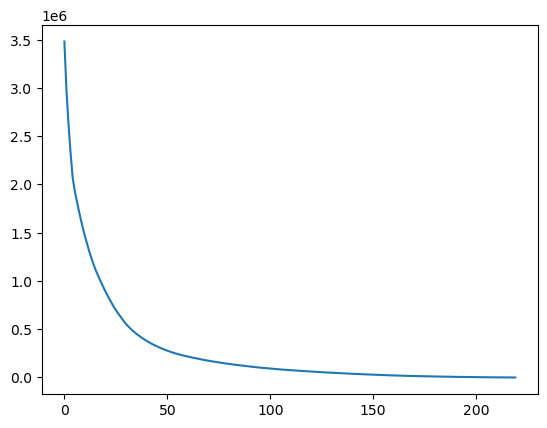

In [33]:
plt.plot(np.arange(0, len(cumsum), 1), cumsum[::-1])

In [39]:
chord_vocab

{2: 504925,
 1: 351965,
 3: 295136,
 5: 253669,
 10: 139287,
 12: 104245,
 0: 101435,
 4: 95705,
 7: 89925,
 8: 82144,
 9: 77104,
 50: 74362,
 58: 66295,
 19: 63468,
 54: 59208,
 61: 49716,
 14: 49155,
 22: 45876,
 48: 44734,
 6: 44571,
 49: 40777,
 11: 39616,
 13: 38580,
 46: 37139,
 28: 33260,
 55: 31489,
 33: 29782,
 45: 29577,
 62: 28852,
 39: 26721,
 21: 22189,
 59: 21757,
 71: 20333,
 53: 18643,
 85: 17323,
 56: 16106,
 93: 15587,
 17: 14592,
 60: 13905,
 47: 13187,
 68: 12782,
 94: 11830,
 18: 11297,
 78: 10582,
 57: 10087,
 74: 9677,
 67: 9666,
 91: 9302,
 69: 7968,
 86: 7961}

In [41]:
CHORD_TO_EMB = dict()
for i, cid in enumerate(chord_vocab.keys()):
    CHORD_TO_EMB[cid] = i

In [42]:
CHORD_TO_EMB

{2: 0,
 1: 1,
 3: 2,
 5: 3,
 10: 4,
 12: 5,
 0: 6,
 4: 7,
 7: 8,
 8: 9,
 9: 10,
 50: 11,
 58: 12,
 19: 13,
 54: 14,
 61: 15,
 14: 16,
 22: 17,
 48: 18,
 6: 19,
 49: 20,
 11: 21,
 13: 22,
 46: 23,
 28: 24,
 55: 25,
 33: 26,
 45: 27,
 62: 28,
 39: 29,
 21: 30,
 59: 31,
 71: 32,
 53: 33,
 85: 34,
 56: 35,
 93: 36,
 17: 37,
 60: 38,
 47: 39,
 68: 40,
 94: 41,
 18: 42,
 78: 43,
 57: 44,
 74: 45,
 67: 46,
 91: 47,
 69: 48,
 86: 49}

In [43]:
for path, dirs, files in os.walk('../data/chords'):
    for name in files:
        file_path = (f'{path}/{name}').replace('\\', '/')
        if name == 'CHORD_DICT.pickle':
            print('Skipping chord dict')
            continue
            
        with open(file_path, 'rb') as f:
            chords = pickle.load(f)
        
        for i, chord in enumerate(chords):
            if chord not in chord_vocab:
                chords[i] = 50 # UNK
            else:
                chords[i] = CHORD_TO_EMB[chord]
        
        with open('../data/chords_reduced/' + name, 'wb') as f:
                pickle.dump(chords, f)

Skipping chord dict


In [44]:
with open('../data/chords_reduced/1a96b3d502448d2a2d8624ba924bad06.pickle', 'rb') as f: 
    sample = pickle.load(f)

In [45]:
sample

array([ 6,  6,  1, 50,  0,  0, 32, 50, 10,  5, 50,  2,  1,  2,  0, 32,  1,
        2,  0, 33, 16, 16, 17, 16, 16, 50, 15, 50, 10, 10, 42,  2, 10,  5,
       42,  2,  1,  2,  0, 32,  1,  2,  0, 14, 16, 16, 17, 16, 16, 50,  4,
       50,  5, 10, 50,  2,  5, 10, 50,  2,  1,  2,  0, 32,  1,  2,  0,  7,
       50, 16, 17, 16, 16, 50, 15, 50, 10, 10, 42,  2, 10,  5, 42,  2,  1,
        2,  0, 32,  1,  2,  0, 14, 16, 16, 16, 50, 16, 50,  4, 50, 10, 50,
       32, 50, 30, 16, 16, 16, 16, 16])

In [46]:
with open('../data/chords_reduced/CHORD_TO_EMB.pickle', 'wb') as f: 
    pickle.dump(CHORD_TO_EMB, f)

In [5]:
import os, csv

In [6]:
filenames = os.listdir('../data/chords_reduced')

In [7]:
filenames = [name[:-7] for name in filenames]

In [8]:
filenames.remove('CHORD_TO_EMB')

In [9]:
len(filenames)

34754

In [18]:
with open('../data/filenames.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for name in filenames:
        w.writerow([name])

In [27]:
def get_chords_from_file(filename):
    file_path = (f'../data/chords_reduced/{filename}.pickle').replace('\\', '/')
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [28]:
def get_piano_roll_from_file(filename):
    file_path = (f'../data/piano_rolls/{filename}.pickle').replace('\\', '/')
    with open(file_path, 'rb') as f:
        return pickle.load(f) 

In [20]:
ub = 72
lb = 36

In [22]:
def build_input(chord, next_chord, piano_roll):
    x = np.zeros((ub - lb) + 2) # pianoroll and  chord
    x[0:(ub-lb)] = piano_roll[lb:ub]
    x[(ub-lb)] = chord
    x[(ub-lb) + 1] = next_chord
    
    return x

In [30]:
def build_X_y_for_track(chords, piano_roll):
    X = []
    y = []
    for i in range(len(chords) - 1):
        for j in range(8):
            if i * 8 + j + 1 >= piano_roll.shape[1]:
                break
            X += [build_input(chords[i], chords[i + 1], piano_roll[:, i * 8 + j])]
            y += [piano_roll[lb:ub, i * 8 + j + 1]]
    return X, y

In [26]:
X = []
y = []

for chords, piano_roll in zip(chord_tracks, piano_rolls):
    X_t, y_t = build_X_y_for_track(chords, piano_roll)
    X += X_t
    y += y_t

X = np.array(X)
y = np.array(y)

In [15]:
def count_compasses(filename):
    piano_roll = get_piano_roll_from_file(filename)
    return piano_roll.shape[1]

In [19]:
cnt = 0
for filename in filenames:
    with open('../data/compass_count.csv', 'a', newline='') as f:
        w = csv.writer(f)
        w.writerow([filename, count_compasses(filename)])
    cnt += 1
    if cnt % 1000 == 0:
        print(cnt)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000


In [32]:
cnt = 0
fcnt = 0
for filename in filenames:
    chords = get_chords_from_file(filename)
    piano_roll = get_piano_roll_from_file(filename)
    
    X_t, y_t = build_X_y_for_track(chords, piano_roll)
    
    with open('../data/X2.csv', 'a', newline='') as f:
        w = csv.writer(f)
        for x in X_t:
            x = [int(p) for p in x]
            w.writerow(x)
    
    with open('../data/y2.csv', 'a', newline='') as f:
        w = csv.writer(f)
        for y in y_t:
            y = [int(p) for p in y]
            w.writerow(y)
            
    with open('../data/compass_count2.csv', 'a', newline='') as f:
        w = csv.writer(f)
        w.writerow([filename, len(y_t)])
    
    cnt += 1
    if(cnt % 1000 == 0):
        print(cnt, fcnt)
    

1000 0
2000 0
3000 0
4000 0
5000 0
6000 0
7000 0
8000 0
9000 0
10000 0
11000 0
12000 0
13000 0
14000 0
15000 0
16000 0
17000 0
18000 0
19000 0
20000 0
21000 0
22000 0
23000 0
24000 0
25000 0
26000 0
27000 0
28000 0
29000 0
30000 0
31000 0
32000 0
33000 0
34000 0
